In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os

In [22]:
img_m, img_n = 192, 168

def get_column_from_pgm(photo_path):
    with open(photo_path, 'rb') as pgmf:
        im = plt.imread(pgmf)
    face_column = np.ndarray.flatten(im)
    return np.reshape(face_column, (-1, 1))

def get_faces_matrix(dir_with_faces):
    # files = os.listdir(dir_with_faces)
    result = np.zeros(img_m * img_n)
    for root, dirs, files in os.walk(dir_with_faces):
        for filename in files:
            original_photo_path = os.path.join(root, filename)
            face_column = get_column_from_pgm(original_photo_path)
            result = np.column_stack((result, face_column))
    return result[:, 1:]

[[80. 94. 59. ...  9.  8. 10.]
 [80. 94. 66. ... 10.  8. 10.]
 [84. 96. 77. ... 10.  9. 11.]
 ...
 [12.  6.  5. ... 76. 90. 85.]
 [12.  7.  7. ... 38. 42. 46.]
 [11.  8.  7. ... 23. 24. 27.]]


In [ ]:
training_faces = get_faces_matrix('./training_faces')
print(training_faces)

In [16]:
average_face = np.mean(training_faces,axis=1)
normalized_faces = training_faces - np.tile(average_face,(training_faces.shape[1],1)).T

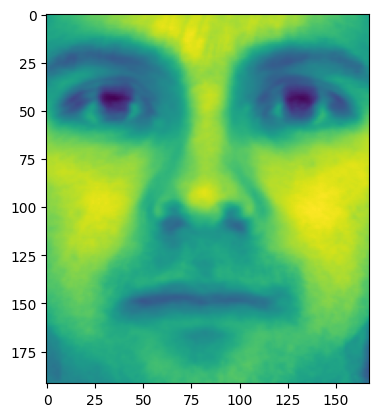

In [25]:
plt.imshow(np.reshape(average_face,(img_m, img_n)))

In [46]:
def simultaneous_power_iteration(A, k):
    n, m = A.shape
    Q = np.random.rand(n, k)
    Q, _ = np.linalg.qr(Q)
    Q_prev = Q
    for i in range(1000):
        Z = A.dot(Q)
        Q, R = np.linalg.qr(Z)
        err = ((Q - Q_prev) ** 2).sum()
        Q_prev = Q
        if err < 1e-3:
            break
    return np.diag(R), Q 

In [49]:
def reduced_svd_using_qr(A):
    eigenvalues, V = simultaneous_power_iteration(A.T @ A, 200)
    sigma = np.sqrt(eigenvalues)
    idx = np.argsort(eigenvalues)[::-1]  
    sigma = sigma[idx] 
    rank_of_A = np.linalg.matrix_rank(A)
    V = V[:,idx]
    sigma = sigma[:rank_of_A]
    V = V[:, :rank_of_A]
    U = (A @ V) @ np.linalg.inv(np.diag(sigma))
    return U, sigma, V.T

In [28]:
def reduced_svd(A):
  '''
  Input: any matrix A
  Returns: tuple of matrix U, array of singular values and matrix V.T 
  '''
  # your code here
  rank_of_A = np.linalg.matrix_rank(A)

  symmetric_matrix_V = A.T @ A

  eigenvalues_V, eigenvectors_V = np.linalg.eigh(symmetric_matrix_V)
  eigenvalues_V[eigenvalues_V < 0] = 0

  idx = np.argsort(eigenvalues_V)[::-1]   
  V = eigenvectors_V[:,idx]
  V = V[:,:rank_of_A]
  
  sigma = np.sort(np.sqrt(eigenvalues_V))[::-1]
  sigma = sigma[:rank_of_A]
  U = (A @ V) @ np.linalg.inv(np.diag(sigma))
  return U, sigma, V.T


def k_rank_approximation(U, sigma, VT, k):
  return U[:,:k], sigma[:k], VT[:k,:]

In [29]:
U, sigma, VT = reduced_svd(normalized_faces)
sigma_VT = np.diag(sigma) @ VT

In [50]:
U_qr, sigma_qr, VT_qr = reduced_svd_using_qr(normalized_faces)

640 640


In [51]:
print(U_qr.shape, sigma_qr.shape, VT_qr.shape)

(32256, 200) (200,) (200, 640)


In [52]:
sigma_VT_qr = np.diag(sigma_qr) @ VT_qr

In [41]:
test_face = training_faces[:,0] - average_face
projected_face_coord = U.T @ test_face

for i in range(64, 640):
    print(np.linalg.norm(projected_face_coord - sigma_VT[:, i]))

In [61]:
test_face = training_faces[:,0] - average_face
projected_face_coord = U_qr.T @ test_face

results = []
for i in range(640):
    dist = np.linalg.norm(projected_face_coord - sigma_VT_qr[:, i])
    # print(dist)
    results.append((dist, i // 64 + 1))

print(sorted(results))

[(2.9868594529974177, 1), (2933.789267912081, 1), (3040.315120517988, 1), (3077.1088161036096, 1), (3300.419391127402, 1), (3302.137722710631, 1), (3774.0543138211992, 1), (3930.3380470199254, 1), (4202.598466855073, 1), (4333.282077272499, 1), (4385.173160487776, 1), (4761.540821056807, 1), (4904.162660130833, 1), (4968.536983364615, 1), (5019.2492604216795, 1), (5300.092475859812, 3), (5481.374320394902, 10), (5491.972544123017, 6), (5507.317818988898, 3), (5651.8427136014625, 3), (5843.506881695168, 7), (5926.702852149371, 7), (5938.148139762216, 6), (5970.184826213189, 7), (6051.883639565363, 4), (6079.118891830249, 6), (6126.136326511228, 7), (6138.5763690760905, 1), (6157.373651353357, 1), (6183.632565971033, 3), (6220.421757608063, 4), (6225.882936146813, 6), (6267.476306459058, 6), (6271.727168918561, 7), (6284.300808611417, 9), (6297.202573356426, 7), (6330.4867354559965, 7), (6402.050194482111, 1), (6434.693666941941, 3), (6449.56661665523, 8), (6507.282987396553, 3), (6522.1